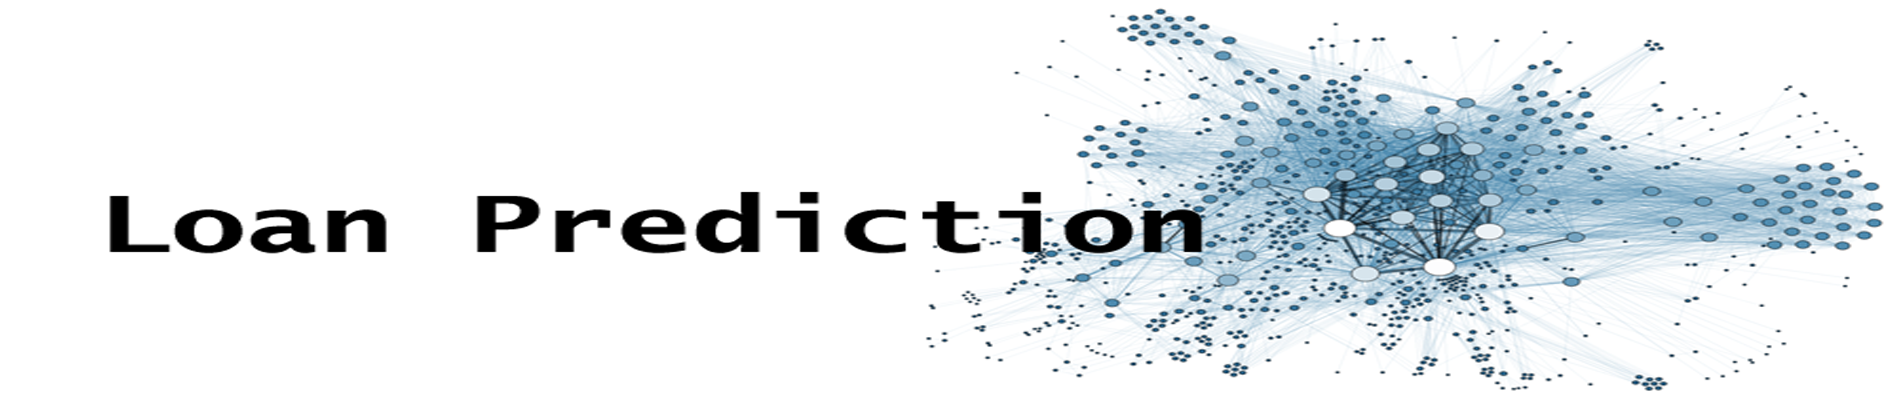

In [1]:
from PIL import Image
read_image=Image.open('data-original.png')
read_image

About Company :- Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem :- Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set. Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Train = pd.read_csv('train_home.csv')

In [3]:
Test = pd.read_csv('test_home.csv')

In [4]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Checking Missing Values in Features
Train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
print(Train.describe().T)

                   count         mean          std    min     25%     50%  \
ApplicantIncome    614.0  5403.459283  6109.041673  150.0  2877.5  3812.5   
CoapplicantIncome  614.0  1621.245798  2926.248369    0.0     0.0  1188.5   
LoanAmount         592.0   146.412162    85.587325    9.0   100.0   128.0   
Loan_Amount_Term   600.0   342.000000    65.120410   12.0   360.0   360.0   
Credit_History     564.0     0.842199     0.364878    0.0     1.0     1.0   

                       75%      max  
ApplicantIncome    5795.00  81000.0  
CoapplicantIncome  2297.25  41667.0  
LoanAmount          168.00    700.0  
Loan_Amount_Term    360.00    480.0  
Credit_History        1.00      1.0  


In [9]:
#Feature Engineering
Train=Train.drop('Loan_ID',axis=1)

In [10]:
Train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
#mapping the categorical fetaures to the numbers.
Train['Gender']=Train['Gender'].map({'Male':1,"Female":0})
Train['Married']=Train['Married'].map({'Yes':1,"No":0})
Train['Self_Employed']=Train['Self_Employed'].map({'Yes':1,"No":0})
Train['Property_Area']=pd.get_dummies(data=Train['Property_Area'],drop_first=True)
Train['Education']=Train['Education'].map({'Graduate':1,'Not Graduate':0})
Train['Loan_Status']=Train['Loan_Status'].map({'Y':1,'N':0})

In [12]:
Train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
Train=Train.drop('Dependents',axis=1)

In [14]:
Train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,1.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


In [15]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [16]:
Train.dtypes

Gender               float64
Married              float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          uint8
Loan_Status            int64
dtype: object

In [17]:
Train.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

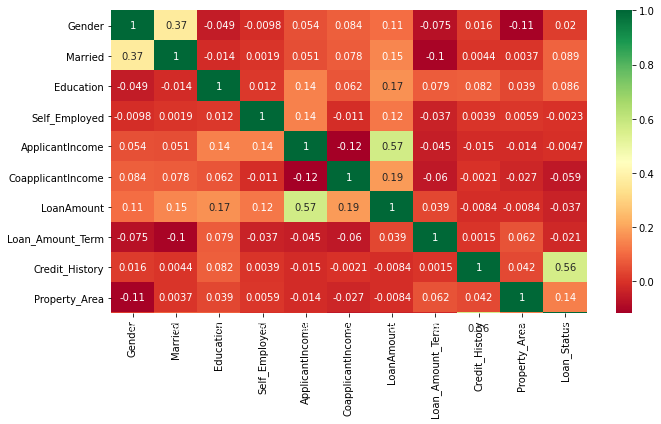

In [18]:
# EDA - Exploratory data analysis
plt.figure(figsize=(10,6))
sns.heatmap(Train.corr(),annot=True,cmap="RdYlGn")
plt.ylim(10,0)
plt.tight_layout()

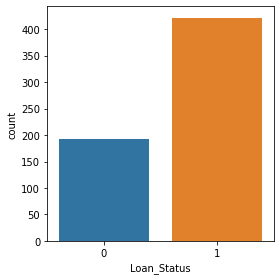

In [19]:
plt.figure(figsize=(4,4))
sns.countplot(Train['Loan_Status'])
plt.tight_layout()

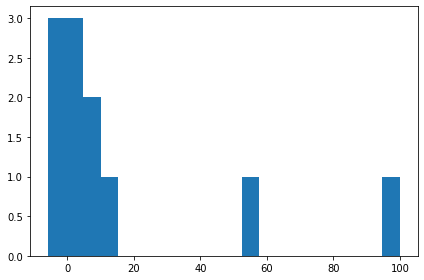

In [20]:
plt.hist(Train.corr()['Loan_Status']*100,bins=20,)
plt.tight_layout()

<AxesSubplot:>

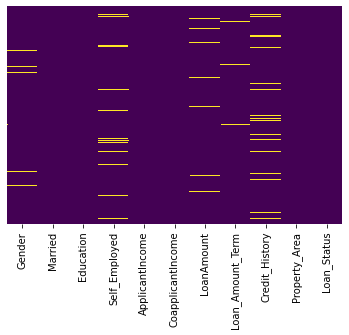

In [21]:
sns.heatmap(Train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

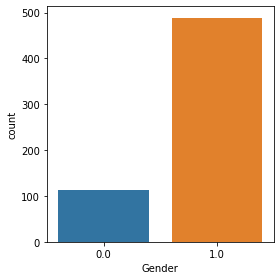

In [22]:
plt.figure(figsize=(4,4))
sns.countplot(Train['Gender'])
plt.tight_layout()

In [23]:
Train.Gender=Train.Gender.fillna(value=1.0,)
Train.Married=Train.Married.fillna(value=1.0,)

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

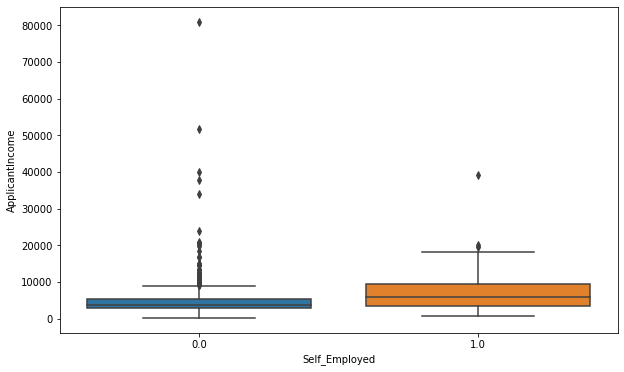

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(y=Train.ApplicantIncome,x=Train.Self_Employed)

In [25]:
Train.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

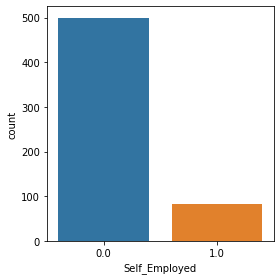

In [26]:
plt.figure(figsize=(4,4))
sns.countplot(Train['Self_Employed'])
plt.tight_layout()

<AxesSubplot:>

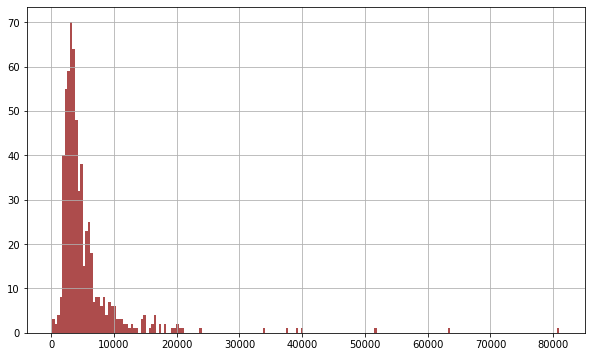

In [27]:
plt.figure(figsize=(10,6))
Train['ApplicantIncome'].hist(bins=200,color='darkred',alpha=0.7)

In [28]:
Train.Self_Employed=Train.Self_Employed.fillna(value=0.0,)

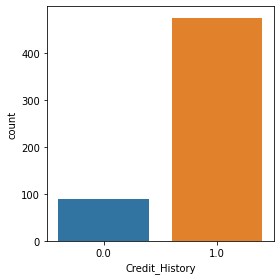

In [29]:
plt.figure(figsize=(4,4))
sns.countplot(Train['Credit_History'])
plt.tight_layout()

<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>

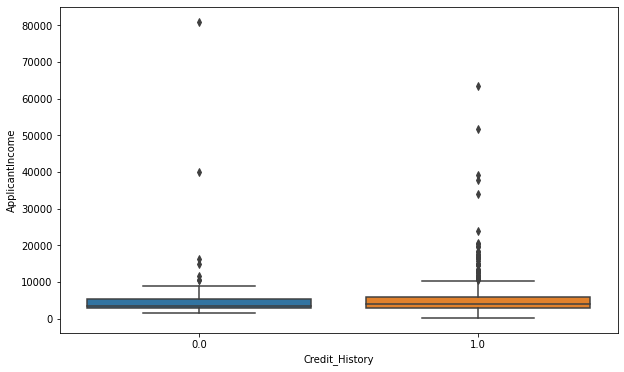

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(y=Train.ApplicantIncome,x=Train.Credit_History)

In [31]:
Train.Credit_History=Train.Credit_History.fillna(value=1.0,)

In [32]:
Train.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [33]:
Train.corr()['Loan_Amount_Term']*100

Gender                -7.453907
Married              -10.204899
Education              7.878429
Self_Employed         -3.436080
ApplicantIncome       -4.530609
CoapplicantIncome     -5.987801
LoanAmount             3.944725
Loan_Amount_Term     100.000000
Credit_History         0.044516
Property_Area          6.195661
Loan_Status           -2.126766
Name: Loan_Amount_Term, dtype: float64

<AxesSubplot:>

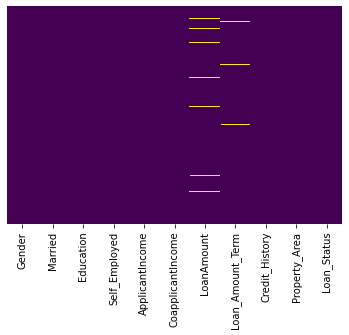

In [34]:
# viridis map is used to check the null values
sns.heatmap(Train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
Train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [36]:
Train.Loan_Amount_Term=Train.Loan_Amount_Term.fillna(value=360.0,)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

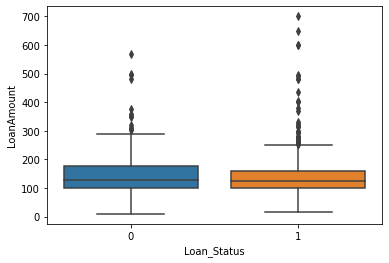

In [37]:
sns.boxplot(y=Train.LoanAmount,x=Train.Loan_Status)

In [38]:
Train.LoanAmount=Train.LoanAmount.fillna(value=Train.LoanAmount.median())

<AxesSubplot:>

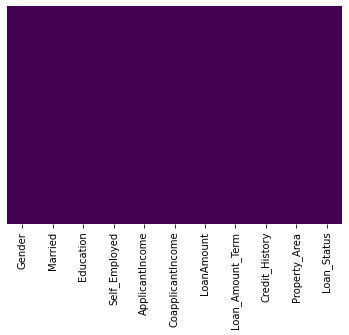

In [39]:
sns.heatmap(Train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
Train.corr().transpose()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.108623,0.017987
Married,0.364569,1.000000,-0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.005845,0.091478
Education,-0.045364,-0.012304,1.000000,0.010383,0.140760,0.062290,0.168759,0.073928,0.073658,0.039410,0.085884
Self_Employed,-0.000525,0.004489,0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,0.008710,-0.003700
ApplicantIncome,0.058809,0.051708,0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.014246,-0.004710
CoapplicantIncome,0.082912,0.075948,0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.027044,-0.059187
LoanAmount,0.106904,0.146546,0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.005804,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,0.059141,-0.022549
Credit_History,0.009170,0.010938,0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.035976,0.540556
Property_Area,-0.108623,0.005845,0.039410,0.008710,-0.014246,-0.027044,-0.005804,0.059141,0.035976,1.000000,0.136540


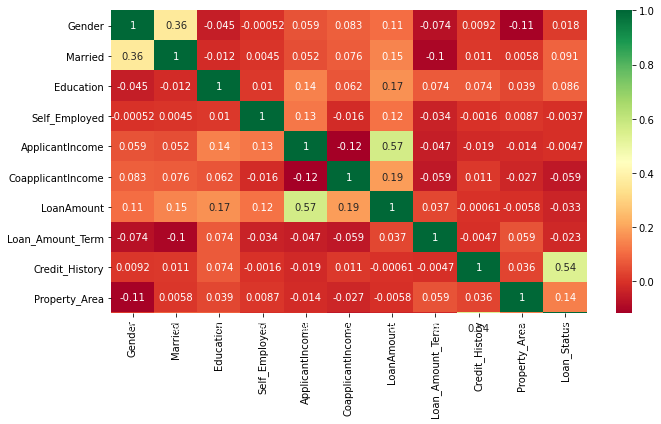

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(Train.corr(),annot=True,cmap="RdYlGn")
plt.ylim(10,0)
plt.tight_layout()

In [42]:
X=Train.drop('Loan_Status',axis=1)
y=Train['Loan_Status']

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [47]:
X_train=scaler.fit_transform(X_train)

In [48]:
X_test=scaler.transform(X_test)

In [49]:
X_train.shape

(429, 10)

## Model Selection

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [51]:
from sklearn.pipeline import Pipeline

In [52]:
pipeline_lr=Pipeline([('scaler1',StandardScaler()),
                      ('lr_classifier',LogisticRegression(random_state=0))])

In [53]:
pipeline_svc=Pipeline([('scaler2',StandardScaler()),
                      ('svc_classifier',SVC(random_state=0))])

In [54]:
pipeline_dt=Pipeline([('scaler3',StandardScaler()),
                      ('dt_classifier',DecisionTreeClassifier(random_state=0))])

In [55]:
pipeline_rf=Pipeline([('scaler4',StandardScaler()),
                      ('rf_classifier',RandomForestClassifier(random_state=0))])

In [56]:
pipelines=[pipeline_lr,pipeline_svc,pipeline_dt,pipeline_rf]

In [57]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [58]:
pipe_dic={0:'logistic regression',1:'SVC',2:'Decision Tree',3:'Random Forest'}

for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [59]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dic[i],model.score(X_test,y_test)))

logistic regression Test Accuracy: 0.7783783783783784
SVC Test Accuracy: 0.7837837837837838
Decision Tree Test Accuracy: 0.745945945945946
Random Forest Test Accuracy: 0.7675675675675676


In [60]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy score:{}'.format(pipe_dic[best_classifier]))

Classifier with best accuracy score:SVC


In [61]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [62]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [63]:
Test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [64]:
print(Test.describe().T)

                   count         mean          std   min      25%     50%  \
ApplicantIncome    367.0  4805.599455  4910.685399   0.0  2864.00  3786.0   
CoapplicantIncome  367.0  1569.577657  2334.232099   0.0     0.00  1025.0   
LoanAmount         362.0   136.132597    61.366652  28.0   100.25   125.0   
Loan_Amount_Term   361.0   342.537396    65.156643   6.0   360.00   360.0   
Credit_History     338.0     0.825444     0.380150   0.0     1.00     1.0   

                      75%      max  
ApplicantIncome    5060.0  72529.0  
CoapplicantIncome  2430.5  24000.0  
LoanAmount          158.0    550.0  
Loan_Amount_Term    360.0    480.0  
Credit_History        1.0      1.0  


In [65]:
Test=Test.drop('Loan_ID',axis=1)

In [66]:
Test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [67]:
Test['Gender']=Test['Gender'].map({'Male':1,"Female":0})
Test['Married']=Test['Married'].map({'Yes':1,"No":0})
Test['Self_Employed']=Test['Self_Employed'].map({'Yes':1,"No":0})
Test['Property_Area']=pd.get_dummies(data=Test['Property_Area'],drop_first=True)
Test['Education']=Test['Education'].map({'Graduate':1,'Not Graduate':0})

In [68]:
Test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,0
1,1.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,0
2,1.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,0
3,1.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,0
4,1.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,0


In [69]:
Test.shape

(367, 11)

In [70]:
Test=Test.drop('Dependents',axis=1)

<AxesSubplot:>

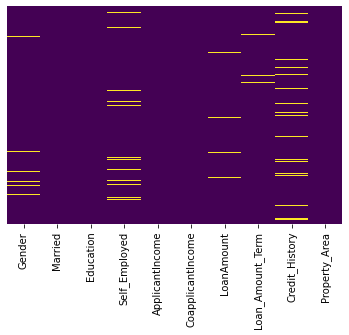

In [71]:
sns.heatmap(Test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [72]:
Test.Gender=Test.Gender.fillna(value=1.0,)
Test.Married=Test.Married.fillna(value=1.0,)
Test.Credit_History=Test.Credit_History.fillna(value=1.0,)

In [73]:
Test.Loan_Amount_Term=Test.Loan_Amount_Term.fillna(value=360.0,)
Test.LoanAmount=Test.LoanAmount.fillna(value=Test.LoanAmount.median())
Test.Self_Employed=Test.Self_Employed.fillna(value=0.0,)

<AxesSubplot:>

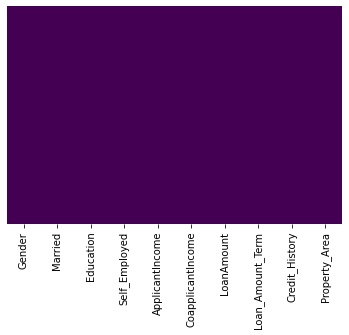

In [74]:
sns.heatmap(Test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [75]:
Test.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [76]:
X_Test=Test.iloc[0:]

In [77]:
X_Test


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,1,0.0,5720,0,110.0,360.0,1.0,0
1,1.0,1,1,0.0,3076,1500,126.0,360.0,1.0,0
2,1.0,1,1,0.0,5000,1800,208.0,360.0,1.0,0
3,1.0,1,1,0.0,2340,2546,100.0,360.0,1.0,0
4,1.0,0,0,0.0,3276,0,78.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,0,1.0,4009,1777,113.0,360.0,1.0,0
363,1.0,1,1,0.0,4158,709,115.0,360.0,1.0,0
364,1.0,0,1,0.0,3250,1993,126.0,360.0,1.0,1
365,1.0,1,1,0.0,5000,2393,158.0,360.0,1.0,0


In [78]:
X_Test=scaler.transform(X_Test)

In [79]:
X_Test

array([[ 0.46770717,  0.70710678,  0.52610428, ...,  0.29690398,
         0.40713741, -0.79837621],
       [ 0.46770717,  0.70710678,  0.52610428, ...,  0.29690398,
         0.40713741, -0.79837621],
       [ 0.46770717,  0.70710678,  0.52610428, ...,  0.29690398,
         0.40713741, -0.79837621],
       ...,
       [ 0.46770717, -1.41421356,  0.52610428, ...,  0.29690398,
         0.40713741,  1.25254232],
       [ 0.46770717,  0.70710678,  0.52610428, ...,  0.29690398,
         0.40713741, -0.79837621],
       [ 0.46770717, -1.41421356,  0.52610428, ..., -2.48009761,
         0.40713741, -0.79837621]])

In [80]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [81]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [82]:
lr_pred=lr.predict(X_test)

In [83]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [84]:
cm=confusion_matrix(lr_pred,y_test)
cm

array([[ 26,   3],
       [ 38, 118]])

In [85]:
classification = classification_report(lr_pred,y_test)
print(classification)

              precision    recall  f1-score   support

           0       0.41      0.90      0.56        29
           1       0.98      0.76      0.85       156

    accuracy                           0.78       185
   macro avg       0.69      0.83      0.71       185
weighted avg       0.89      0.78      0.81       185



In [86]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [87]:
svc_pred=svc.predict(X_test)

In [88]:
classification_svc = classification_report(svc_pred,y_test)
print(classification_svc)

              precision    recall  f1-score   support

           0       0.41      0.93      0.57        28
           1       0.98      0.76      0.86       157

    accuracy                           0.78       185
   macro avg       0.69      0.84      0.71       185
weighted avg       0.90      0.78      0.81       185



In [89]:
lr_pred_Test=lr.predict(X_Test)
lr_pred_Test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [90]:
svc_pred_Test=svc.predict(X_Test)
svc_pred_Test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [92]:
Test = pd.read_csv('test_home.csv')
data=Test['Loan_ID']

In [93]:
data1=np.array(svc_pred_Test)
print(data1)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [97]:
dataset = pd.DataFrame({'Loan_ID': data, 'Loan_Status': data1})
dataset.head(15)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [98]:
dataset['Loan_Status']=dataset.Loan_Status.map({1:'Y',0:'N'})
dataset.head(15)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y
